# 처방기록 중 관심약품 필터링 파일

In [11]:
# 라이브러리를 불러옵니다.
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 추출 (항우울제)
항우울제로 사용되는 약물들만 추출하도록 하겠습니다.

In [33]:
# 주성분코드 리스트를 읽어옵니다.
with open('./data/antidepressant_MI_code.txt', 'r') as f:
    mi_codes = f.read().splitlines()

2017년도 데이터

In [7]:
# 데이터의 구조를 확인합니다.
pd.read_csv('./raw_data/2017/국민건강보험공단_의약품처방정보_2017(1).CSV', encoding='cp949', nrows=3)

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2017,1,340428,1,1,15,31,20170629,131801ATB,1.0,3,10,15.0,450,20181126
1,2017,1,340428,2,1,15,31,20170629,172101ATB,1.0,3,10,16.0,480,20181126
2,2017,1,340428,3,1,15,31,20170629,193302ATB,1.0,3,10,98.0,2940,20181126


2019년도 데이터

In [23]:
pd.read_csv('./raw_data/2019/T60_2019_1백만.1.csv', encoding='cp949', nrows=3).head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2019,1,103911229,3,1,2,41,20190225,101842AGN,0.6667,3,3,90.0,540,20201222
1,2019,1,103911229,1,1,2,41,20190225,244330ASY,7.0000,3,3,15.0,945,20201222
2,2019,1,103911229,2,1,2,41,20190225,183135ASY,8.0000,3,3,20.0,1440,20201222


2020년도 데이터

In [ ]:
pd.read_csv('./raw_data/2020/HP_T60_2020_1.CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927,2021-12-29
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927,2021-12-29
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927,2021-12-29


In [ ]:
# 모든 파일에서 주성분코드 리스트에 있는 주성분코드가 포함된 행만 추출합니다.
for year in [2017, 2019, 2020]:  # 2017~2020년 데이터를 읽어옵니다.
    rows = []
    for file in os.listdir(f'./raw_data/{year}'):  # 모든 파일을 읽어옵니다.
        for chunk in pd.read_csv(f'./raw_data/{year}/' + file, encoding='cp949', chunksize=100000):
            rows.append(chunk[chunk['약품일반성분명코드'].isin(mi_codes)])
    pd.concat(rows).to_csv(f'./data/antidepressant_prescription_{year}.csv', index=False)

2021년도 데이터 (주의: 컬럼명 다름)

In [25]:
pd.read_csv('raw_data/2021/국민건강보험공단_의약품처방정보_01_20211231.csv', encoding='cp949', nrows=3).head()

,STND_Y,IDV_ID,KEY_SEQ,SEQ_NO,SEX,AGE_GROUP,SIDO,RECU_FR_DT,GNL_NM_CD,DD_MQTY_FREQ,DD_EXEC_FREQ,MDCN_EXEC_FREQ,UN_COST,AMT,DATA_STD_DT
0,2021,628074,9261,1,2,13,41,2021-09-13,347701ACH,1.0,1,3,521.0,1563,2022-08-11
1,2021,730013,13348,1,2,13,41,2021-02-17,493801ATB,1.0,1,3,534.0,1602,2022-08-11
2,2021,97734,16827,1,2,13,41,2021-06-10,374602ATB,1.0,1,3,469.0,1407,2022-08-11


In [ ]:
rows = []
for file in os.listdir(f'./raw_data/2021'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2021/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['GNL_NM_CD'].isin(mi_codes)])
df_2021 = pd.concat(rows)

column

2022년도 데이터 (주의: 성분명코드 변환)

In [ ]:
# 데이터의 구조를 확인합니다.
pd.read_csv('raw_data/2022/국민건강보험공단_의약품처방정보_2022_1(수정).CSV', encoding='cp949', nrows=3).head()

,기준년도,가입자일련번호,처방내역일련번호,약품일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드(ATC코드),1회투약량,1일투약량,총투여일수
0,2022,278817,5270722,1,2,13,41,2022-03-04,M01AE,1.0,3,3
1,2022,132289,13021551,1,2,13,41,2022-03-23,M01AE,1.0,3,3
2,2022,151731,10392393,1,2,13,41,2022-04-18,M01AE,1.0,3,3


In [55]:
mapping = pd.read_csv("data/mapping.csv")
post_22_codes = mapping[mapping['주성분코드_9'].isin(mi_codes)]['ATC코드'].drop_duplicates().tolist()

In [59]:
rows = []
for file in os.listdir(f'./raw_data/2022'):  # 모든 파일을 읽어옵니다.
    for chunk in pd.read_csv(f'./raw_data/2022/' + file, encoding='cp949', chunksize=100000):
        rows.append(chunk[chunk['약품일반성분명코드(ATC코드)'].isin(post_22_codes)])
pd.concat(rows).to_csv('./data/antidepressant_prescription_2022.csv', index=False)

---
### EDA

In [72]:
# 모든 데이터를 같이 불러옵니다.
df_2019 = pd.read_csv('./data/antidepressant_prescription_2019.csv')
df_2020 = pd.read_csv('./data/antidepressant_prescription_2020.csv')
df_2021 = pd.read_csv('./data/antidepressant_prescription_2021.csv')
df_2022 = pd.read_csv('./data/antidepressant_prescription_2022.csv')

In [ ]:
mapping.head()

,주성분코드_9,ATC코드,주성분명,주성분코드_5
0,130830ASY,N05CC01,chloral hydrate,1308A
1,130832ASY,N05CC01,chloral hydrate,1308A
2,130833ASY,N05CC01,chloral hydrate,1308A
3,149203ATB,N05CM,Other hypnotics and sedatives,1492A
4,149204ATB,N05CM,Other hypnotics and sedatives,1492A


In [110]:
ad_mapping = mapping[mapping['주성분코드_9'].isin(mi_codes)]

# 다대다 매핑이 있는지 확인
ad_mapping[ad_mapping.duplicated('주성분코드_9')]

,주성분코드_9,ATC코드,주성분명,주성분코드_5
4629,149203ATB,N06AA12,doxepin,1492A
4630,149204ATB,N06AA12,doxepin,1492A


In [111]:
ad_mapping[ad_mapping['주성분코드_9'].isin(['149203ATB', '149204ATB'])]

,주성분코드_9,ATC코드,주성분명,주성분코드_5
3,149203ATB,N05CM,Other hypnotics and sedatives,1492A
4,149204ATB,N05CM,Other hypnotics and sedatives,1492A
4629,149203ATB,N06AA12,doxepin,1492A
4630,149204ATB,N06AA12,doxepin,1492A


각 코드의 ATC정보를 확인해 봤을때 독세핀 주성분은 N06AA12로 코드화 하는것이 맞다고 판단함

In [112]:
ad_mapping = ad_mapping.drop([3, 4])
ad_mapping.to_csv('data/antidepressant_mapping.csv', index=False)

In [108]:
df_2019['ATC코드'] = df_2019['약품일반성분명코드'].map(ad_mapping.set_index('주성분코드_9')['ATC코드'])

In [77]:
mapping.set_index('주성분코드_9')['ATC코드']

주성분코드_9
130830ASY    N05CC01
130832ASY    N05CC01
130833ASY    N05CC01
149203ATB      N05CM
149204ATB      N05CM
              ...   
158212CPL    N02AB03
158213CPL    N02AB03
630905CSI    N02AB03
630906CSI    N02AB03
630909CSI    N02AB03
Name: ATC코드, Length: 6213, dtype: object

In [73]:
# 19, 20, 21년도의 주성분코드를 ATC코드로 변환합니다
for df_year in [df_2019, df_2020, df_2021]:
    df_year['ATC코드'] = df_year['약품일반성분명코드'].map(mapping.set_index('주성분코드_9')['ATC코드'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# 컬럼명을 통일합니다
df_2021.columns = df_2019.columns
df_2022.columns = df_2019.columns[:-3]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수
0,2022,264997,9091809,1,2,17,45,2022-03-14,N06AX23,1.0,1,28
1,2022,264997,4973049,1,2,17,45,2022-02-14,N06AX23,1.0,1,28
2,2022,264997,10160693,1,2,17,45,2022-04-08,N06AX23,1.0,1,28
3,2022,264997,12151036,1,2,17,45,2022-01-17,N06AX23,1.0,1,28
4,2022,264997,80086,1,2,17,45,2022-05-06,N06AX23,1.0,1,28


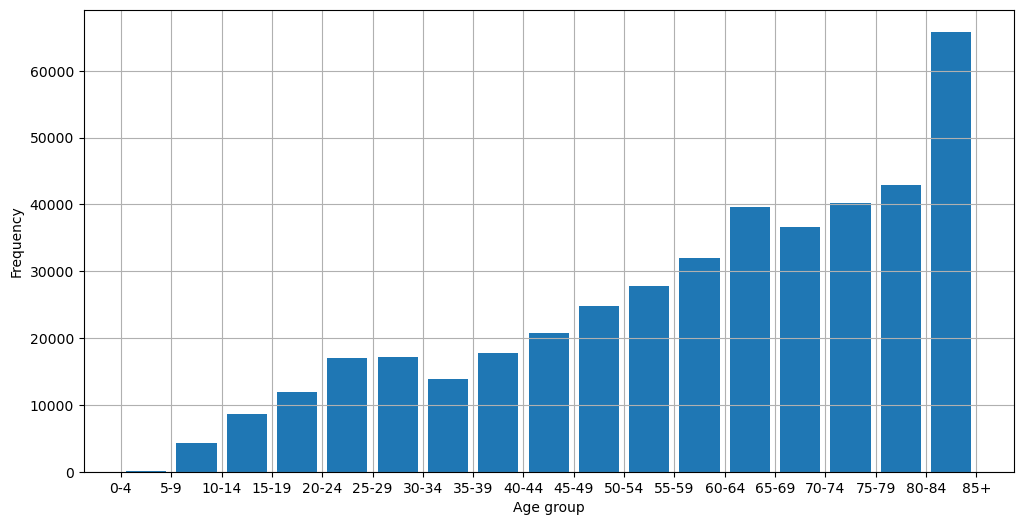

In [ ]:
# 각 연령대별 처방전 수를 연도별로 시각화합니다
data['연령대'] = pd.cut(data['연령'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])
data.groupby(['연도', '연령대코드()']).size().unstack().plot(kind='bar', stacked=True)
plt.title('연령대별 항우울제 처방전 수')
plt.ylabel('처방전 수')
plt.show()

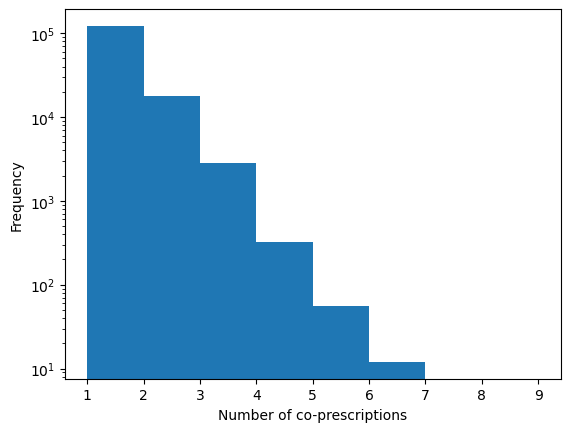

In [21]:
# 처방내역일련번호으로 그룹화하여 같이 처방된 약품의 개수를 세어봅니다.
prescription_counts = df.groupby('처방내역일련번호').size()

# 처방된 약품의 개수를 히스토그램으로 그립니다.
plt.hist(prescription_counts, bins=range(1, 10))
plt.xlabel('Number of co-prescriptions')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

---

In [22]:
# 항우울제가 처방된 처방전의 리스트를 만듭니다.
prescriptions = df['처방내역일련번호'].unique()

In [23]:
# 원본 데이터에서 해당되는 처방전을 추출합니다.
rows = []
for chunk in pd.read_csv('./raw_data/국민건강보험공단_의약품처방정보_2017(1).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['처방내역일련번호'].isin(prescriptions)])
for chunk in pd.read_csv('./raw_data/국민건강보험공단_의약품처방정보_2017(2).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['처방내역일련번호'].isin(prescriptions)])
for chunk in pd.read_csv('./raw_data/국민건강보험공단_의약품처방정보_2017(3).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['처방내역일련번호'].isin(prescriptions)])

# 추출한 행을 합칩니다.
df_full = pd.concat(rows)

In [24]:
# 추출한 데이터에 null 값이 있는지 확인합니다.
print(df_full.isnull().sum())

# 데이터에 중복된 행이 있는지 확인합니다.
print("중복된 행의 수:", df_full.duplicated().sum())

# null 값이 있는 행을 제거합니다.
df_full = df_full.dropna()

기준년도            0
가입자일련번호         0
처방내역일련번호        0
일련번호            0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
요양개시일자          0
약품일반성분명코드      90
1회 투약량          0
1일투약량           0
총투여일수           0
단가              0
금액              0
데이터 공개일자        0
dtype: int64
중복된 행의 수: 0


In [25]:
# 추출한 데이터를 CSV 파일로 저장합니다.
df_full.to_csv('./data/anti_depressant_prescription_all_meds.csv', index=False)